In [1]:
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

from keras.utils import to_categorical           # Library for One Hot Encoding
import keras.preprocessing.image as img


In [2]:
# !pwd

In [3]:
# Import Dataset
file_path = os.path.join("../Resources","fashion_mnist_test.csv")
df_testing=pd.read_csv(file_path)

In [4]:
df_testing.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# Import Dataset
file_path = os.path.join("../Resources","fashion-mnist_train.csv")
df_training=pd.read_csv(file_path)

In [6]:
df_training.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
training_images = np.array(df_training.iloc[0:,1:])
training_images = training_images.reshape(len(training_images), 28,28) 
training_images = training_images.astype('float32')
training_labels = np.array(df_training.iloc[:,0])
training_labels = to_categorical(training_labels) 

In [8]:
testing_images = np.array(df_testing.iloc[0:,1:])
testing_images = testing_images.reshape(len(testing_images), 28,28)
testing_images = testing_images.astype('float32')
testing_labels = df_testing.iloc[:,0]

test_for_pred = testing_images  

In [9]:
test_labels_for_pred = testing_labels
testing_labels = to_categorical(testing_labels)

In [10]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [11]:
training_images.shape

(60000, 28, 28)

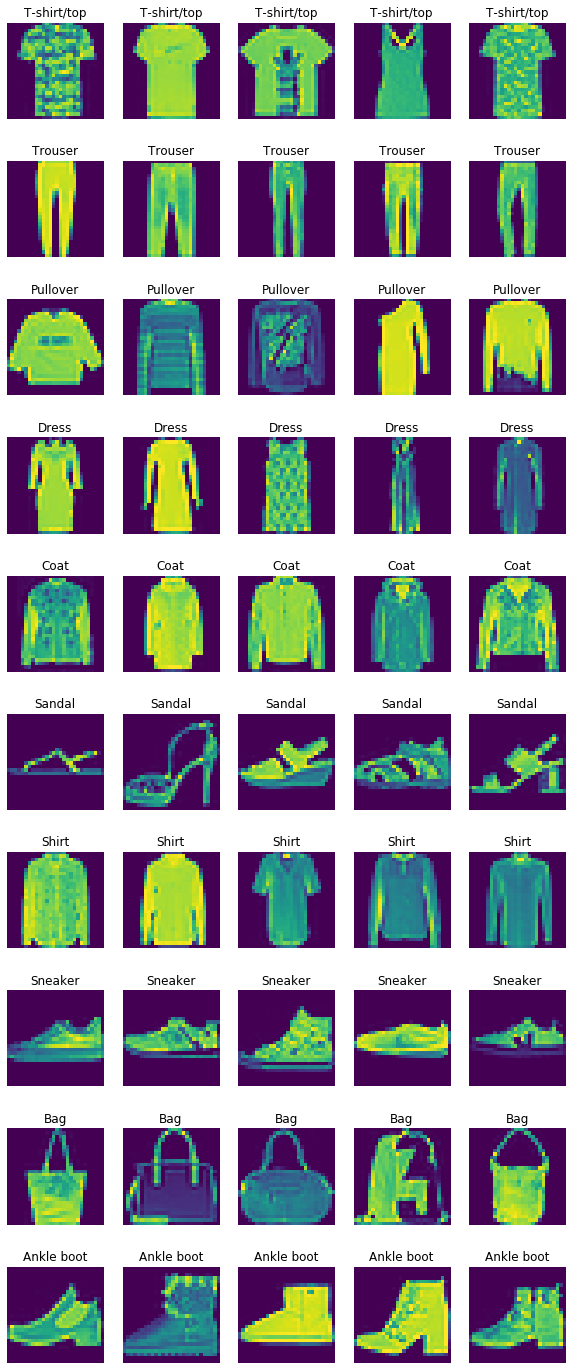

In [12]:
fig, ax = plt.subplots(10,5, figsize = (10,25))
for i,c_name in enumerate(class_names):
    temp = df_training[df_training.iloc[:,0] == i].head(5)
    for k in range(5):
        ax[i,k].imshow(np.array(temp.iloc[k,1:]).reshape(28,28))
        ax[i,k].axis('off')
        ax[i,k].grid(False)
        ax[i,k].title.set_text(str(c_name)) 

In [13]:
training_images = np.expand_dims(training_images, axis = 3)
testing_images = np.expand_dims(testing_images, axis = 3)

training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [14]:
print(training_images.shape)
print(training_labels.shape)

(60000, 28, 28, 1)
(60000, 10)


In [15]:
# Image Augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

training_datagen = ImageDataGenerator(zoom_range=0.1,
                                      shear_range = 0.1,
                                      rotation_range = 0.1,
                                      horizontal_flip=True,
                                      fill_mode = 'nearest')

training_datagen.fit(training_images)

In [16]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding= 'same', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.20),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding= 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')])

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
history = model.fit(training_datagen.flow(training_images, training_labels), verbose = 1, epochs = 60, batch_size = 50, steps_per_epoch= len(training_images)/ 50, validation_data= (testing_images, testing_labels))

Epoch 1/60
1200/1200 [==============================] - 35s 29ms/step - loss: 0.7573 - accuracy: 0.7264 - val_loss: 0.3443 - val_accuracy: 0.8745
Epoch 2/60
1200/1200 [==============================] - 40s 33ms/step - loss: 0.4091 - accuracy: 0.8508 - val_loss: 0.3074 - val_accuracy: 0.8894
Epoch 3/60
1200/1200 [==============================] - 37s 31ms/step - loss: 0.3572 - accuracy: 0.8699 - val_loss: 0.2745 - val_accuracy: 0.8999
Epoch 4/60
1200/1200 [==============================] - 50s 41ms/step - loss: 0.3241 - accuracy: 0.8779 - val_loss: 0.2481 - val_accuracy: 0.9058
Epoch 5/60
1200/1200 [==============================] - 52s 43ms/step - loss: 0.3159 - accuracy: 0.8802 - val_loss: 0.2352 - val_accuracy: 0.9128
Epoch 6/60
1200/1200 [==============================] - 50s 41ms/step - loss: 0.2898 - accuracy: 0.8912 - val_loss: 0.2436 - val_accuracy: 0.9076
Epoch 7/60
1200/1200 [==============================] - 55s 46ms/step - loss: 0.2861 - accuracy: 0.8951 - val_loss: 0.2227 -

In [18]:
# Model Evaluation

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

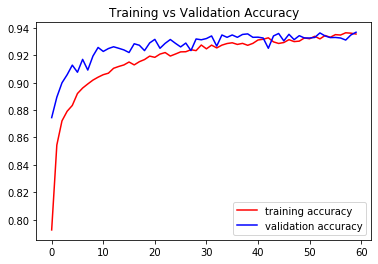

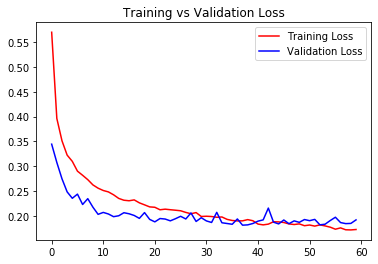

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(60)

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs , val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [20]:
history.history


{'loss': [0.5701217651367188,
  0.3962464928627014,
  0.3511415719985962,
  0.3222748041152954,
  0.3096591532230377,
  0.28989315032958984,
  0.28154611587524414,
  0.272746205329895,
  0.2621366083621979,
  0.2555489242076874,
  0.25088706612586975,
  0.24802348017692566,
  0.24220289289951324,
  0.23491902649402618,
  0.2312614768743515,
  0.23019881546497345,
  0.23192082345485687,
  0.22597676515579224,
  0.2219509333372116,
  0.21780715882778168,
  0.21704328060150146,
  0.2120058834552765,
  0.21322524547576904,
  0.21210841834545135,
  0.21110044419765472,
  0.20999877154827118,
  0.2066727578639984,
  0.20402568578720093,
  0.20631752908229828,
  0.19846035540103912,
  0.1989501267671585,
  0.19838957488536835,
  0.19686780869960785,
  0.19748161733150482,
  0.19267717003822327,
  0.19039830565452576,
  0.1895325630903244,
  0.18966765701770782,
  0.19215518236160278,
  0.1899077445268631,
  0.18313685059547424,
  0.18155290186405182,
  0.1830424815416336,
  0.1878093183040619

In [21]:
# df = pd.DataFrame(list(history.history.items()),orient = "columns", columns = ['loss','accuracy'])
history_history_df = pd.DataFrame.from_dict(history.history)

In [22]:
history_history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.570122,0.792552,0.344333,0.8745
1,0.396246,0.854479,0.307435,0.8894
2,0.351142,0.872135,0.274506,0.8999
3,0.322275,0.879141,0.248094,0.9058
4,0.309659,0.883385,0.235189,0.9128


In [23]:
history_history_df.to_csv("history_history_df.csv", index=False)

In [24]:
test_for_pred = np.expand_dims(test_for_pred, axis = 3)
test_predictions = model.predict_classes(test_for_pred)

from sklearn.metrics import classification_report
print(classification_report(test_labels_for_pred, test_predictions, target_names = class_names))

C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

 T-shirt/top       0.86      0.38      0.53      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.92      0.40      0.55      1000
       Dress       0.92      0.65      0.76      1000
        Coat       0.46      0.87      0.61      1000
      Sandal       0.95      0.80      0.87      1000
       Shirt       0.34      0.62      0.44      1000
     Sneaker       0.89      0.84      0.86      1000
         Bag       0.79      0.97      0.87      1000
  Ankle boot       0.96      0.69      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.81      0.72      0.73     10000
weighted avg       0.81      0.72      0.73     10000



In [25]:
pic_names = os.listdir('images/DavidImages')   
print(pic_names[0:2])

['bag1.jpg', 'bag2.jpg']


IndexError: index 6 is out of bounds for axis 1 with size 6

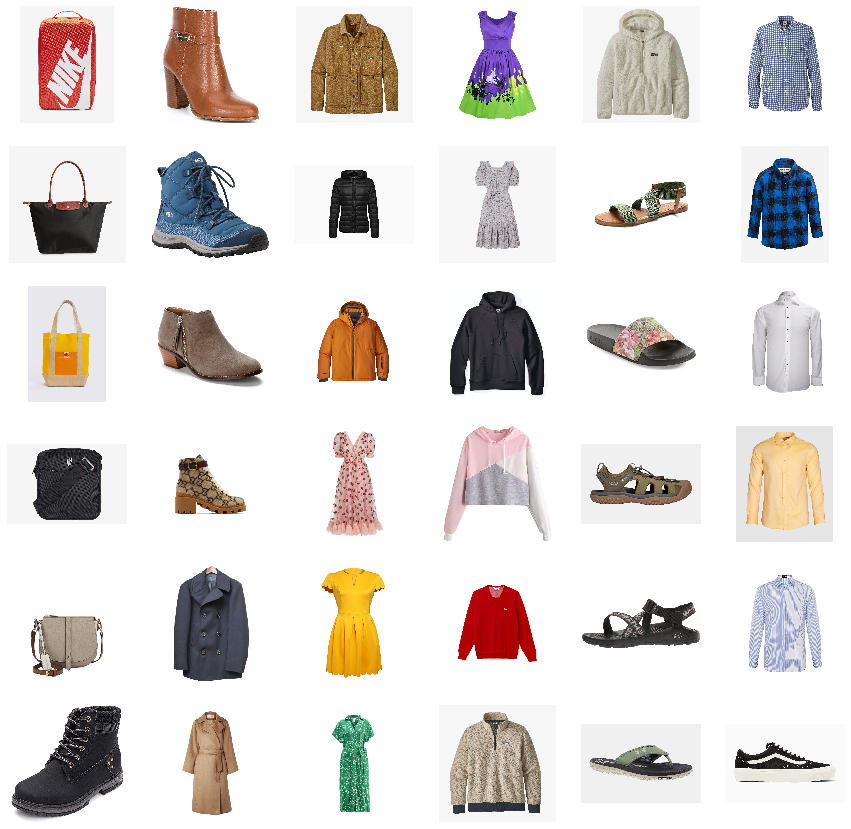

In [26]:
# Loading the Real Pictures
real_images = []
fig, ax = plt.subplots(6,6, figsize = (15,15))
i = 0
k = 0
for f in pic_names:
    path = 'images/DavidImages/'
    image = img.load_img(path + f)     
    if i>5:
        k+=1
        i=0
    ax[i,k].imshow(image)
    ax[i,k].grid(False)
    ax[i,k].axis('off')
    i+=1

In [27]:
# Real pictures Prediction

import keras.preprocessing.image as img
images = []
for f in pic_names:
    path = 'images/DavidImages/'
    image = img.load_img(path + f, grayscale=True, target_size=(28,28))      # Convert into grayscle and 28x28
    x = img.img_to_array(image)
    images.append(x.reshape(28,28))

C:\Users\tobia\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [28]:
class_names_list =[]
file_names_list=[]

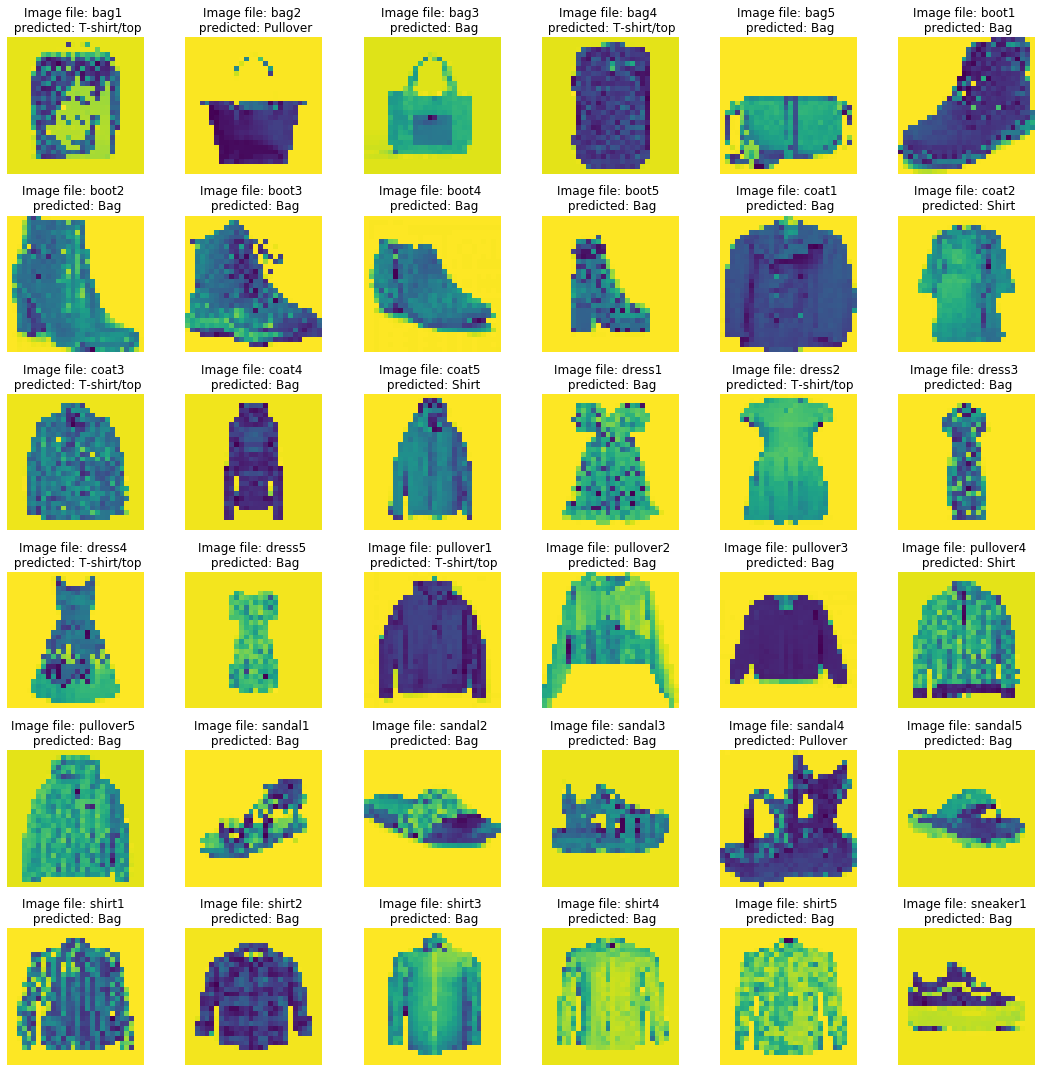

In [29]:
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images[pic])]}')
    class_names_list.append(class_names[np.argmax(predicted_images[pic])])
    file_names_list.append(file_name)
    pic +=1 
plt.tight_layout()
plt.show()

In [30]:
file_names_list

['bag1',
 'bag2',
 'bag3',
 'bag4',
 'bag5',
 'boot1',
 'boot2',
 'boot3',
 'boot4',
 'boot5',
 'coat1',
 'coat2',
 'coat3',
 'coat4',
 'coat5',
 'dress1',
 'dress2',
 'dress3',
 'dress4',
 'dress5',
 'pullover1',
 'pullover2',
 'pullover3',
 'pullover4',
 'pullover5',
 'sandal1',
 'sandal2',
 'sandal3',
 'sandal4',
 'sandal5',
 'shirt1',
 'shirt2',
 'shirt3',
 'shirt4',
 'shirt5',
 'sneaker1']

In [31]:
class_names_list

['T-shirt/top',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Shirt',
 'T-shirt/top',
 'Bag',
 'Shirt',
 'Bag',
 'T-shirt/top',
 'Bag',
 'T-shirt/top',
 'Bag',
 'T-shirt/top',
 'Bag',
 'Bag',
 'Shirt',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Pullover',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag']

In [32]:
# Create Dataframe
predicted_actual_df1 = pd.DataFrame()
predicted_actual_df1["File Name"] = file_names_list
predicted_actual_df1["Predicted Name"] = class_names_list

In [33]:
predicted_actual_df1.head()

,File Name,Predicted Name
0,bag1,T-shirt/top
1,bag2,Pullover
2,bag3,Bag
3,bag4,T-shirt/top
4,bag5,Bag


In [34]:
# predicted_actual_df1.count()

In [35]:
predicted_actual_df1.to_csv("predicted_actual_df1.csv", index=False)

In [36]:
class_names_list3 =[]
file_names_list3 =[]

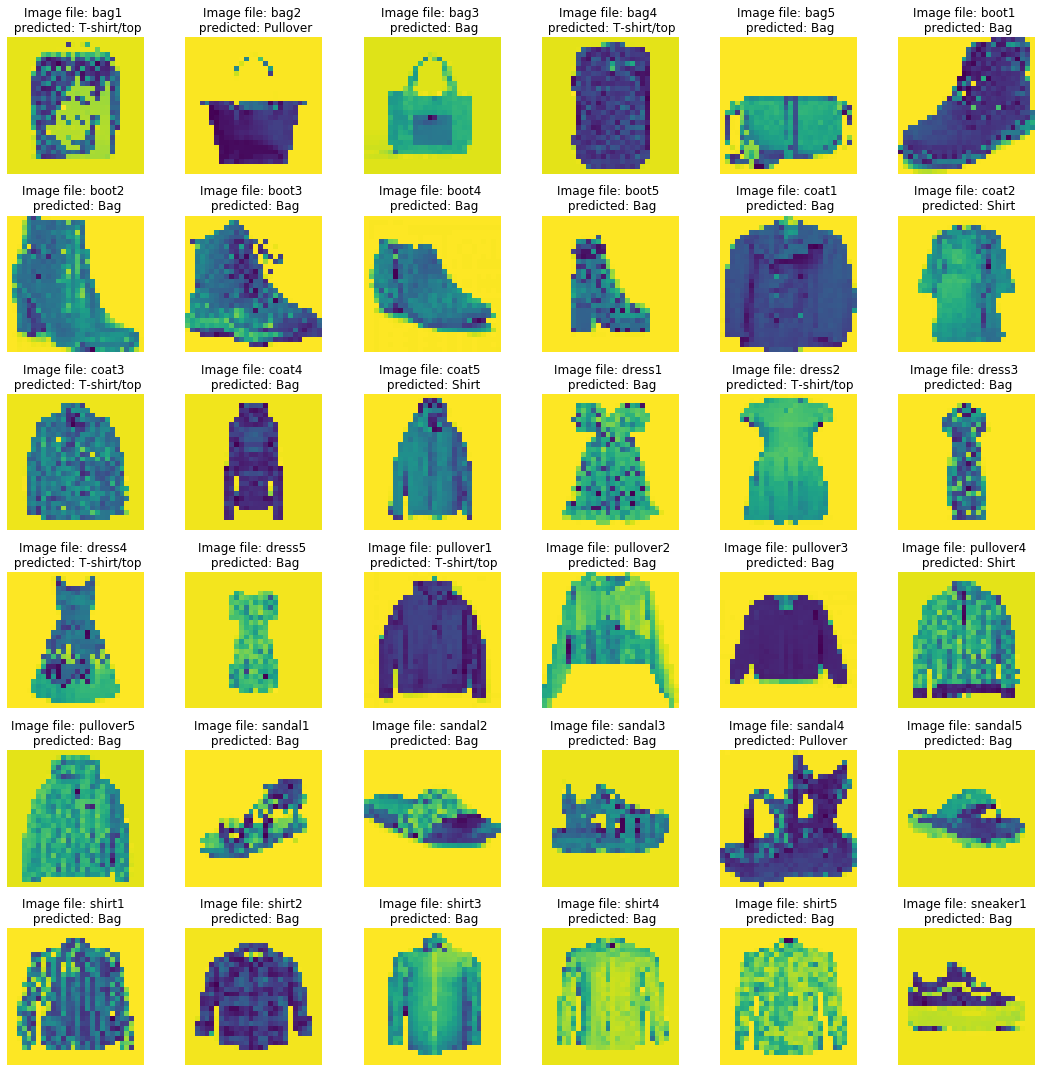

In [37]:
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images[pic])]}')
    class_names_list3.append(class_names[np.argmax(predicted_images[pic])])
    file_names_list3.append(file_name)
    pic +=1 
plt.tight_layout()
plt.show()

In [38]:
file_names_list3

['bag1',
 'bag2',
 'bag3',
 'bag4',
 'bag5',
 'boot1',
 'boot2',
 'boot3',
 'boot4',
 'boot5',
 'coat1',
 'coat2',
 'coat3',
 'coat4',
 'coat5',
 'dress1',
 'dress2',
 'dress3',
 'dress4',
 'dress5',
 'pullover1',
 'pullover2',
 'pullover3',
 'pullover4',
 'pullover5',
 'sandal1',
 'sandal2',
 'sandal3',
 'sandal4',
 'sandal5',
 'shirt1',
 'shirt2',
 'shirt3',
 'shirt4',
 'shirt5',
 'sneaker1']

In [39]:
class_names_list3

['T-shirt/top',
 'Pullover',
 'Bag',
 'T-shirt/top',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Shirt',
 'T-shirt/top',
 'Bag',
 'Shirt',
 'Bag',
 'T-shirt/top',
 'Bag',
 'T-shirt/top',
 'Bag',
 'T-shirt/top',
 'Bag',
 'Bag',
 'Shirt',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Pullover',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag',
 'Bag']

In [40]:
# Create Dataframe
predicted_actual_df3 = pd.DataFrame()
predicted_actual_df3["File Name"] = file_names_list3
predicted_actual_df3["Predicted Name"] = class_names_list3

In [41]:
predicted_actual_df3.head()

,File Name,Predicted Name
0,bag1,T-shirt/top
1,bag2,Pullover
2,bag3,Bag
3,bag4,T-shirt/top
4,bag5,Bag


In [42]:
predicted_actual_df3.count()

File Name         36
Predicted Name    36
dtype: int64

In [43]:
predicted_actual_df3.to_csv("predicted_actual_df3.csv", index=False)

In [44]:
pred_list = []
out_list = []
for i,img in enumerate(predicted_images):
    pred = class_names[np.argmax(img)]
    out = pic_names[i]
    pred_list.append(pred)
    out_list.append(out)
pred_list
out_list

['bag1.jpg',
 'bag2.jpg',
 'bag3.jpg',
 'bag4.jpg',
 'bag5.jpg',
 'boot1.jpg',
 'boot2.jpg',
 'boot3.jpg',
 'boot4.jpg',
 'boot5.jpg',
 'coat1.jpg',
 'coat2.jpg',
 'coat3.jpg',
 'coat4.jpg',
 'coat5.jpg',
 'dress1.jpg',
 'dress2.jpg',
 'dress3.jpg',
 'dress4.jpg',
 'dress5.jpg',
 'pullover1.jpg',
 'pullover2.jpg',
 'pullover3.jpg',
 'pullover4.jpg',
 'pullover5.jpg',
 'sandal1.jpg',
 'sandal2.jpeg',
 'sandal3.jpg',
 'sandal4.jpg',
 'sandal5.jpg',
 'shirt1.jpg',
 'shirt2.jpg',
 'shirt3.jpg',
 'shirt4.jpg',
 'shirt5.jpg',
 'sneaker1.jpg',
 'sneaker2.jpg',
 'sneaker3.jpg',
 'sneaker4.png',
 'sneaker5.jpg',
 't-shirt1.jpg',
 't-shirt2.jpg',
 't-shirt3.jpg',
 't-shirt4.jpg',
 't-shirt5.jpg',
 'trouser1.jpg',
 'trouser2.jpg',
 'trouser3.jpg',
 'trouser4.jpeg',
 'trouser5.jpg']

In [45]:
predicted_actual_df4 = pd.DataFrame()
predicted_actual_df4["File Name"] = out_list
predicted_actual_df4["Predicted Name"] = pred_list

In [46]:
predicted_actual_df4.head()

,File Name,Predicted Name
0,bag1.jpg,T-shirt/top
1,bag2.jpg,Pullover
2,bag3.jpg,Bag
3,bag4.jpg,T-shirt/top
4,bag5.jpg,Bag


In [47]:
predicted_actual_df4.count()

File Name         50
Predicted Name    50
dtype: int64

In [48]:
predicted_actual_df4.to_csv("predicted_actual_df4.csv", index=False)

In [49]:
true_pred = 0
for i,img in enumerate(predicted_images):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images))*100,2)} of the real pictures are predicted correctly.')

8.0 of the real pictures are predicted correctly.


In [50]:
#The real pictures' background is converted to 0.
for pic in range(len(images)):
  for i in range(28):
    for k in range(28):
      if images[pic][i][k] >= 235:
        images[pic][i][k] = 0
      else:
        images[pic][i][k] =images[pic][i][k]

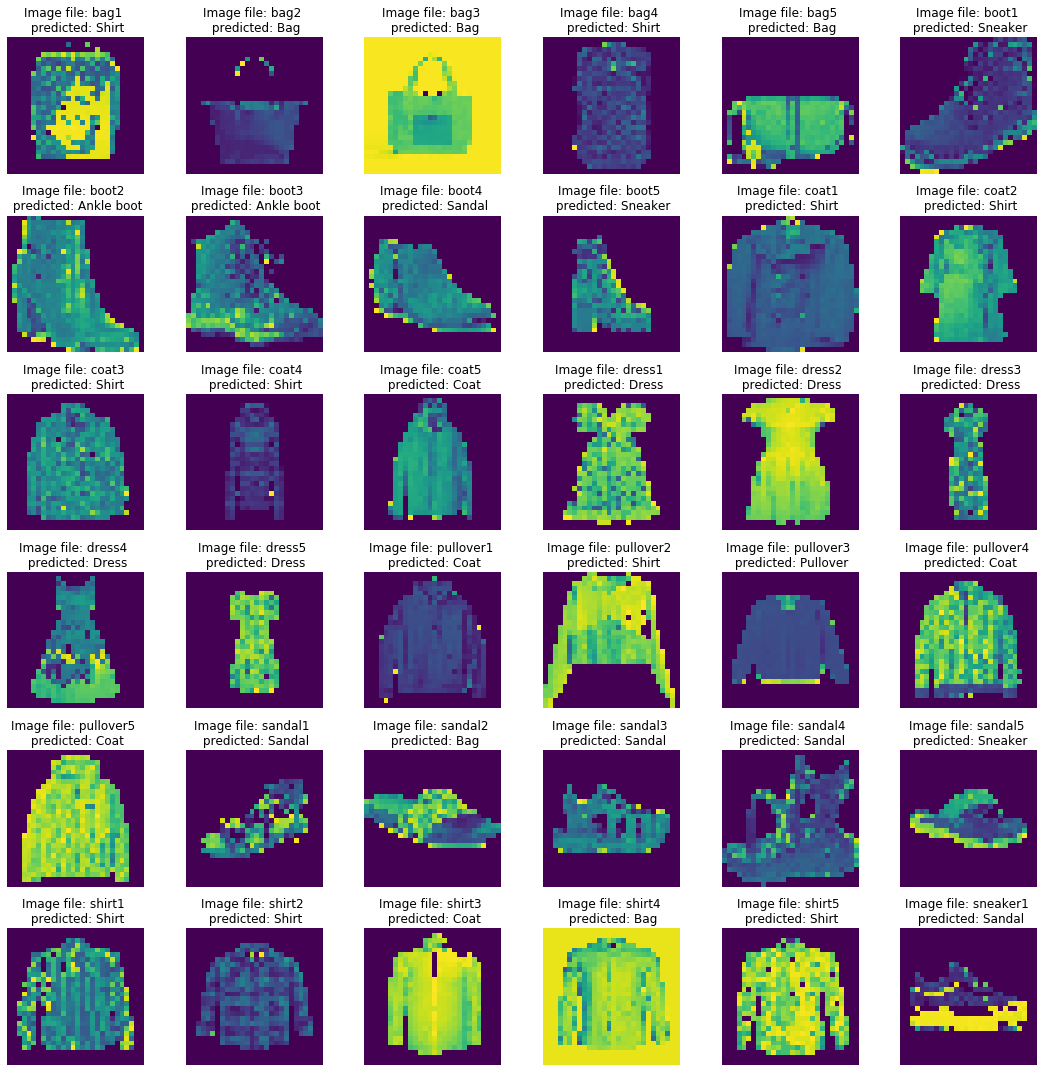

In [51]:
import matplotlib.gridspec as gridspec
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images1 = model.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0
for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images1[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [52]:
# Correct prediction rate
true_pred = 0
for i,img in enumerate(predicted_images1):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images1))*100,2)} of the real pictures are predicted correctly.')
    

46.0 of the real pictures are predicted correctly.


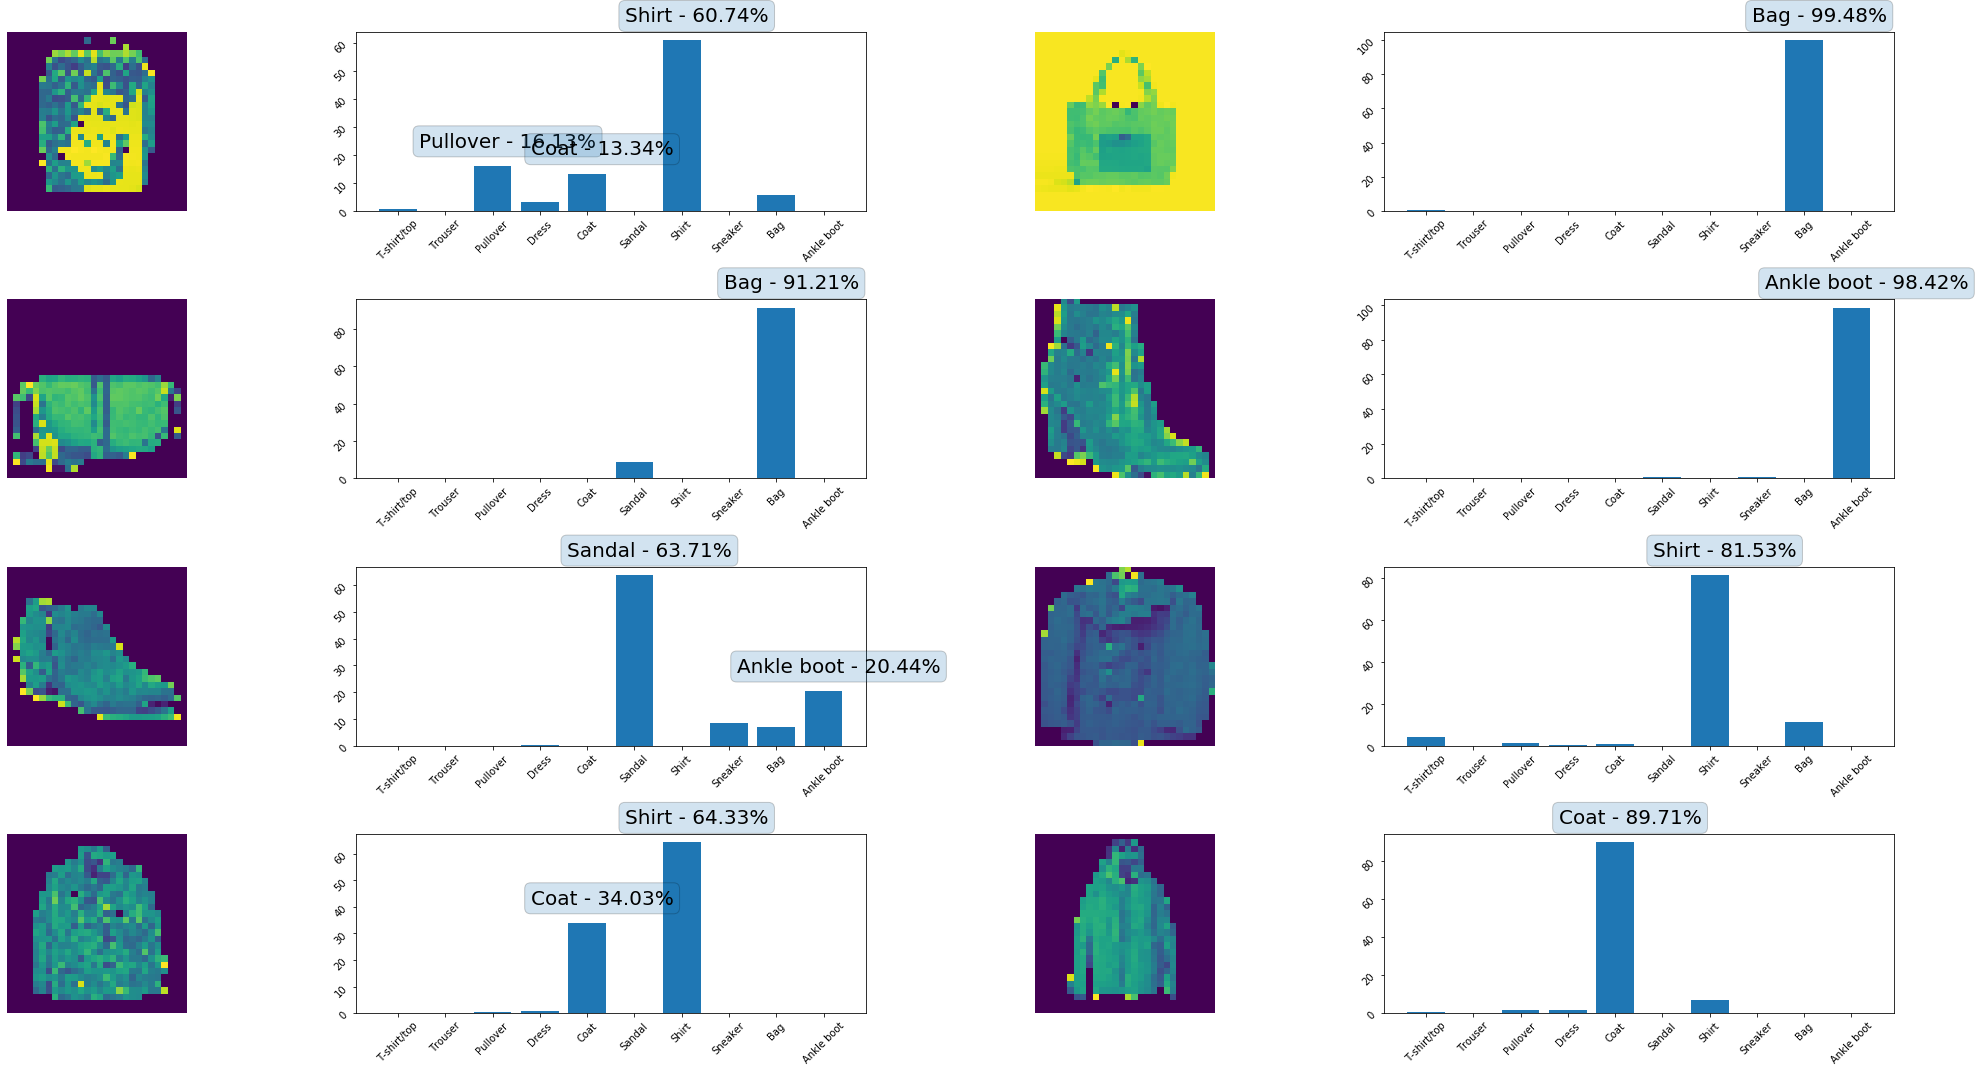

In [53]:
pic = 0
fig, ax = plt.subplots(4,4, figsize =(30,15))
for i in range(4):
  for k in range(4):
    if k % 2 == 0:
      ax[i,k].imshow(images[pic])
      ax[i,k].axis('off')
      ax[i,k].grid(False)
    elif k % 2 == 1:
      ax[i,k].bar(class_names, predicted_images1[pic-1]* 100 )
      ax[i,k].tick_params(rotation =45)
      for a,p in enumerate(ax[i,k].patches):
        if p.get_height() > 12:
            
            ax[i,k].annotate(f"{class_names[a]} - "+format( p.get_height(),'.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), bbox=dict(boxstyle="round", alpha=0.2),size = 20, ha = 'center', va = 'bottom', xytext = (15,15), textcoords = 'offset points')
    pic +=1
    
plt.tight_layout()

In [54]:
model2 = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu', padding= 'same', input_shape=(28, 28, 1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.20),
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu', padding= 'same'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Dropout(0.25),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(256, activation = 'relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    tf.keras.layers.Dense(10 , activation = 'softmax')])

model2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model2.fit(training_images, training_labels, verbose = 1, epochs = 60, batch_size = 50, steps_per_epoch= len(training_images)/ 50, validation_data= (testing_images, testing_labels))


Epoch 1/60
1200/1200 [==============================] - 56s 47ms/step - loss: 0.6846 - accuracy: 0.7498 - val_loss: 0.3137 - val_accuracy: 0.8869
Epoch 2/60
1200/1200 [==============================] - 60s 50ms/step - loss: 0.3440 - accuracy: 0.8760 - val_loss: 0.2654 - val_accuracy: 0.9021
Epoch 3/60
1200/1200 [==============================] - 51s 43ms/step - loss: 0.2891 - accuracy: 0.8935 - val_loss: 0.2438 - val_accuracy: 0.9102
Epoch 4/60
1200/1200 [==============================] - 49s 40ms/step - loss: 0.2592 - accuracy: 0.9055 - val_loss: 0.2195 - val_accuracy: 0.9204
Epoch 5/60
1200/1200 [==============================] - 51s 43ms/step - loss: 0.2430 - accuracy: 0.9099 - val_loss: 0.2076 - val_accuracy: 0.9206
Epoch 6/60
1200/1200 [==============================] - 48s 40ms/step - loss: 0.2280 - accuracy: 0.9164 - val_loss: 0.2054 - val_accuracy: 0.9243
Epoch 7/60
1200/1200 [==============================] - 48s 40ms/step - loss: 0.2136 - accuracy: 0.9207 - val_loss: 0.2046 -

In [55]:
# Model Comparasion
test_predictions = model.predict_classes(test_for_pred)
from sklearn.metrics import classification_report
print('Model 1 with augmentation\n')
print(classification_report(test_labels_for_pred, test_predictions, target_names = class_names))

test_predictions2 = model2.predict_classes(test_for_pred)
from sklearn.metrics import classification_report
print('Model 2 without augmentation\n')
print(classification_report(test_labels_for_pred, test_predictions2, target_names = class_names))

C:\Users\tobia\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Model 1 with augmentation

              precision    recall  f1-score   support

 T-shirt/top       0.86      0.38      0.53      1000
     Trouser       0.99      0.95      0.97      1000
    Pullover       0.92      0.40      0.55      1000
       Dress       0.92      0.65      0.76      1000
        Coat       0.46      0.87      0.61      1000
      Sandal       0.95      0.80      0.87      1000
       Shirt       0.34      0.62      0.44      1000
     Sneaker       0.89      0.84      0.86      1000
         Bag       0.79      0.97      0.87      1000
  Ankle boot       0.96      0.69      0.80      1000

    accuracy                           0.72     10000
   macro avg       0.81      0.72      0.73     10000
weighted avg       0.81      0.72      0.73     10000

Model 2 without augmentation

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.80      0.82      1000
     Trouser       0.97      0.99      0.98      1000
    Pullover       0.

In [56]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)             

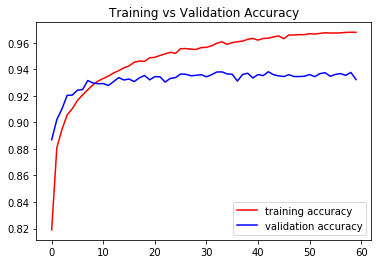

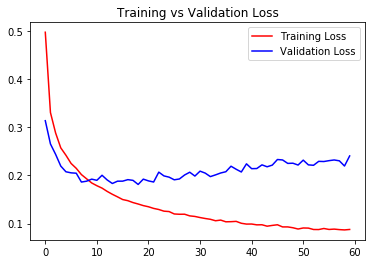

In [59]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(60)

plt.plot(epochs, acc, 'r', label = 'training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'validation accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, 'r', label = 'Training Loss')
plt.plot(epochs , val_loss, 'b', label = 'Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.show()

In [60]:
history.history

{'loss': [0.4973609447479248,
  0.33055612444877625,
  0.2881963551044464,
  0.25726112723350525,
  0.24192699790000916,
  0.22488559782505035,
  0.2147618532180786,
  0.20178700983524323,
  0.19307255744934082,
  0.18435651063919067,
  0.17865484952926636,
  0.17368245124816895,
  0.1668100655078888,
  0.16082769632339478,
  0.15551498532295227,
  0.149947389960289,
  0.14758427441120148,
  0.14365895092487335,
  0.14067666232585907,
  0.13735027611255646,
  0.13495826721191406,
  0.13155007362365723,
  0.129262775182724,
  0.12581750750541687,
  0.12497766315937042,
  0.11998380720615387,
  0.1193784773349762,
  0.1194799542427063,
  0.11601153016090393,
  0.11484237760305405,
  0.11255291849374771,
  0.11057949811220169,
  0.10892768204212189,
  0.1059022918343544,
  0.10727715492248535,
  0.1037236899137497,
  0.1039811298251152,
  0.10461939871311188,
  0.10065381973981857,
  0.09897426515817642,
  0.09909196197986603,
  0.09738848358392715,
  0.09757295995950699,
  0.094625748693

In [61]:
epochs_df = pd.DataFrame()
epochs_df["epochs"] = epochs

In [62]:
epochs_df.head()

,epochs
0,0
1,1
2,2
3,3
4,4


In [63]:
epochs_df.to_csv("epochs_df.csv", index=False)

In [64]:
# df = pd.DataFrame(list(history.history.items()),orient = "columns", columns = ['loss','accuracy'])
history_history_df2 = pd.DataFrame.from_dict(history.history)

In [65]:
history_history_df2.head()

,loss,accuracy,val_loss,val_accuracy
0,0.497361,0.818933,0.313684,0.8869
1,0.330556,0.880950,0.265374,0.9021
2,0.288196,0.894767,0.243804,0.9102
3,0.257261,0.905683,0.219451,0.9204
4,0.241927,0.910333,0.207607,0.9206


In [66]:
history_history_df2.to_csv("history_history_df2.csv", index=False)

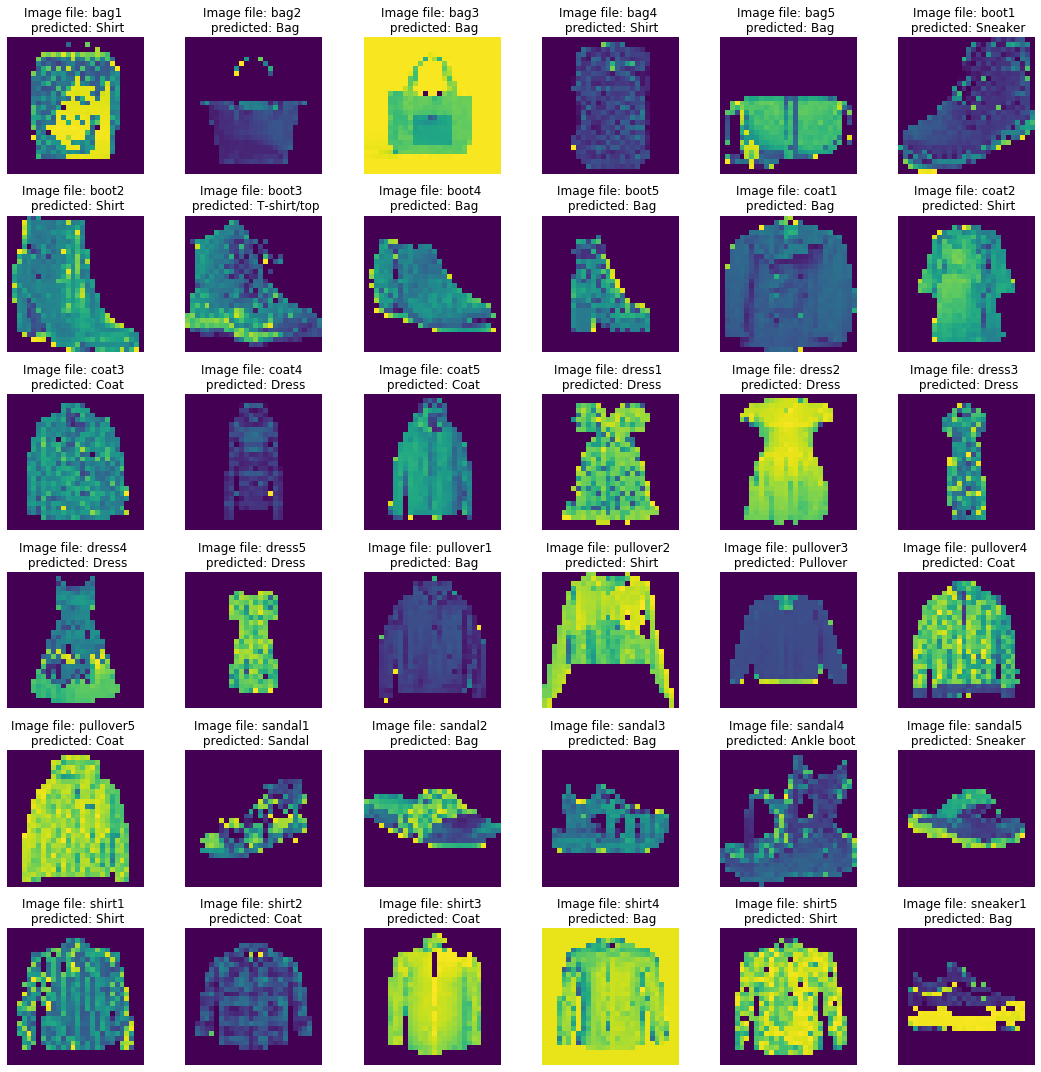

In [67]:
import matplotlib.gridspec as gridspec
obj_images = np.expand_dims(images, axis = 3)
obj_images = obj_images.astype('float32')
obj_images = obj_images / 255.0
predicted_images2 = model2.predict(obj_images)

fig, ax = plt.subplots(6,6, figsize = (15,15))
pic = 0

for i in range(6):
  for k in range(6):
    ax[i,k].imshow(images[pic])
    #ax[i,k].add_subplot(gs[i,k])
    ax[i,k].axis('off')
    ax[i,k].grid(False)
    file_name = pic_names[pic].split('.')[0]
    ax[i,k].title.set_text(f'Image file: {file_name} \n predicted: {class_names[np.argmax(predicted_images2[pic])]}')
    pic +=1 
plt.tight_layout()
plt.show()

In [68]:
true_pred = 0
for i,img in enumerate(predicted_images2):
    pred = class_names[np.argmax(img)]
    pred = list(pred)[0].lower() + list(pred)[1].lower()
    out = list(pic_names[i])[0].lower() + list(pic_names[i])[1].lower()
    if pred == out:
        true_pred += 1
print(f'{round((true_pred/len(predicted_images2))*100,2)} of the real pictures are predicted correctly.')
    

42.0 of the real pictures are predicted correctly.


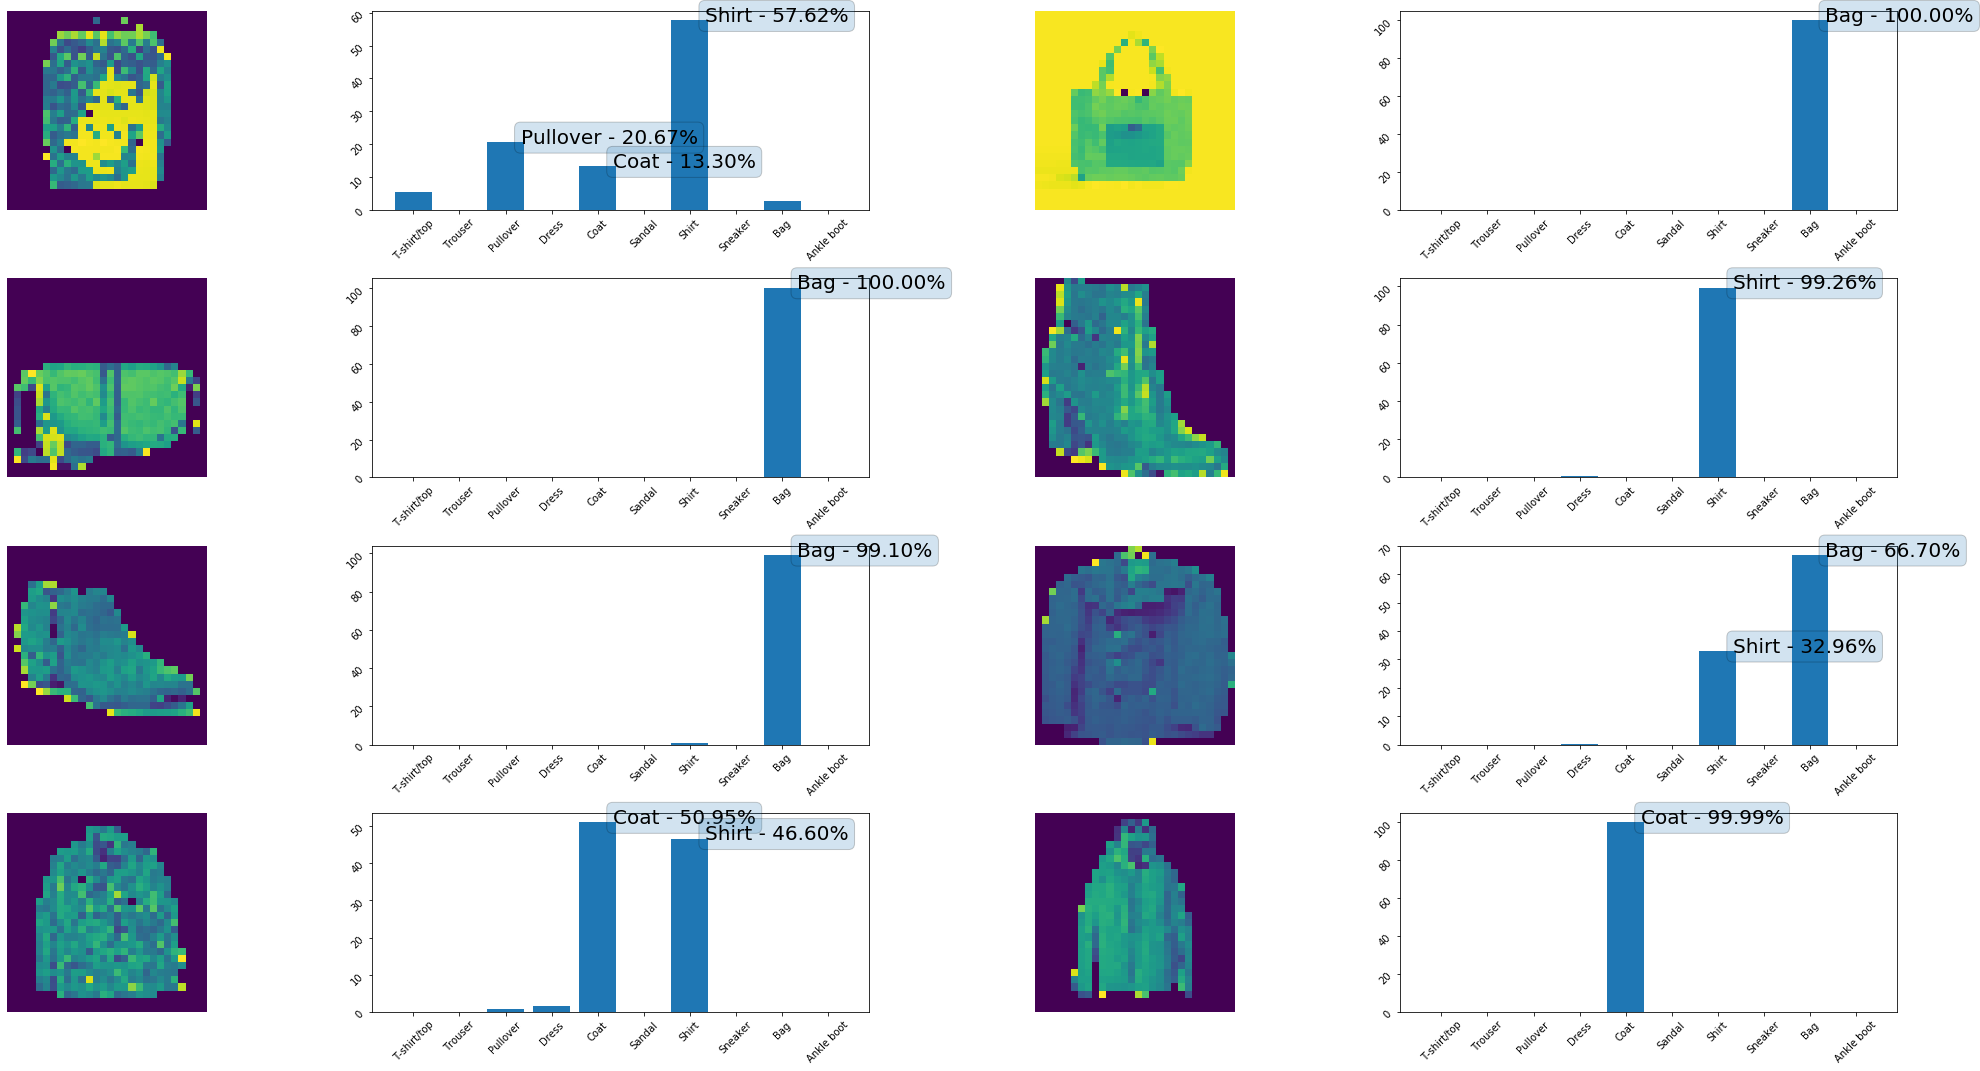

In [69]:
pic = 0
fig, ax = plt.subplots(4,4, figsize =(30,15))
for i in range(4):
  for k in range(4):
    if k % 2 == 0:
      ax[i,k].imshow(images[pic])
      ax[i,k].axis('off')
      ax[i,k].grid(False)
    elif k % 2 == 1:
      ax[i,k].bar(class_names, predicted_images2[pic-1]* 100 )
      ax[i,k].tick_params(rotation =45)
      for a,p in enumerate(ax[i,k].patches):

        if p.get_height() > 12:
            
            ax[i,k].annotate(f"{class_names[a]} - "+format( p.get_height(),'.2f') + "%", (p.get_x() + p.get_width() / 2., p.get_height()), bbox=dict(boxstyle="round", alpha=0.2),size = 20, ha = 'left', va = 'bottom', xytext = (15,-5), textcoords = 'offset points')
    pic +=1
    
plt.tight_layout()

In [70]:
# model.save("EPOCH60ver2.h5")

In [71]:
pred_list3 = []
out_list3 = []
for i,img in enumerate(predicted_images1):
    pred2 = class_names[np.argmax(img)]
    out2 = pic_names[i]
    pred_list3.append(pred2)
    out_list3.append(out2)
pred_list
out_list

['bag1.jpg',
 'bag2.jpg',
 'bag3.jpg',
 'bag4.jpg',
 'bag5.jpg',
 'boot1.jpg',
 'boot2.jpg',
 'boot3.jpg',
 'boot4.jpg',
 'boot5.jpg',
 'coat1.jpg',
 'coat2.jpg',
 'coat3.jpg',
 'coat4.jpg',
 'coat5.jpg',
 'dress1.jpg',
 'dress2.jpg',
 'dress3.jpg',
 'dress4.jpg',
 'dress5.jpg',
 'pullover1.jpg',
 'pullover2.jpg',
 'pullover3.jpg',
 'pullover4.jpg',
 'pullover5.jpg',
 'sandal1.jpg',
 'sandal2.jpeg',
 'sandal3.jpg',
 'sandal4.jpg',
 'sandal5.jpg',
 'shirt1.jpg',
 'shirt2.jpg',
 'shirt3.jpg',
 'shirt4.jpg',
 'shirt5.jpg',
 'sneaker1.jpg',
 'sneaker2.jpg',
 'sneaker3.jpg',
 'sneaker4.png',
 'sneaker5.jpg',
 't-shirt1.jpg',
 't-shirt2.jpg',
 't-shirt3.jpg',
 't-shirt4.jpg',
 't-shirt5.jpg',
 'trouser1.jpg',
 'trouser2.jpg',
 'trouser3.jpg',
 'trouser4.jpeg',
 'trouser5.jpg']

In [72]:
predicted_actual_df6 = pd.DataFrame()
predicted_actual_df6["File Name"] = out_list3
predicted_actual_df6["Predicted Name"] = pred_list3

In [73]:
predicted_actual_df6.head()

,File Name,Predicted Name
0,bag1.jpg,Shirt
1,bag2.jpg,Bag
2,bag3.jpg,Bag
3,bag4.jpg,Shirt
4,bag5.jpg,Bag


In [74]:
predicted_actual_df6.count()

File Name         50
Predicted Name    50
dtype: int64

In [75]:
predicted_actual_df6.to_csv("predicted_actual_df6.csv", index=False)

In [77]:
pred_list4 = []
out_list4 = []
for i,img in enumerate(predicted_images2):
    pred4 = class_names[np.argmax(img)]
    out4 = pic_names[i]
    pred_list4.append(pred4)
    out_list4.append(out4)
pred_list4
out_list4

['bag1.jpg',
 'bag2.jpg',
 'bag3.jpg',
 'bag4.jpg',
 'bag5.jpg',
 'boot1.jpg',
 'boot2.jpg',
 'boot3.jpg',
 'boot4.jpg',
 'boot5.jpg',
 'coat1.jpg',
 'coat2.jpg',
 'coat3.jpg',
 'coat4.jpg',
 'coat5.jpg',
 'dress1.jpg',
 'dress2.jpg',
 'dress3.jpg',
 'dress4.jpg',
 'dress5.jpg',
 'pullover1.jpg',
 'pullover2.jpg',
 'pullover3.jpg',
 'pullover4.jpg',
 'pullover5.jpg',
 'sandal1.jpg',
 'sandal2.jpeg',
 'sandal3.jpg',
 'sandal4.jpg',
 'sandal5.jpg',
 'shirt1.jpg',
 'shirt2.jpg',
 'shirt3.jpg',
 'shirt4.jpg',
 'shirt5.jpg',
 'sneaker1.jpg',
 'sneaker2.jpg',
 'sneaker3.jpg',
 'sneaker4.png',
 'sneaker5.jpg',
 't-shirt1.jpg',
 't-shirt2.jpg',
 't-shirt3.jpg',
 't-shirt4.jpg',
 't-shirt5.jpg',
 'trouser1.jpg',
 'trouser2.jpg',
 'trouser3.jpg',
 'trouser4.jpeg',
 'trouser5.jpg']

In [78]:
predicted_actual_nonaugmented = pd.DataFrame()
predicted_actual_nonaugmented["File Name"] = out_list4
predicted_actual_nonaugmented["Predicted Name"] = pred_list4

In [79]:
predicted_actual_nonaugmented.head()

,File Name,Predicted Name
0,bag1.jpg,Shirt
1,bag2.jpg,Bag
2,bag3.jpg,Bag
3,bag4.jpg,Shirt
4,bag5.jpg,Bag


In [80]:
predicted_actual_nonaugmented.to_csv("predicted_actual_nonaugmented.csv", index=False)